In [1]:
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matploblib'

## 07/02/2020
Created a simple array of zeros, where each array element is denoting the number of growth units at that site.
The represents a square lattice of NxN dimensions where we keep the parameter N variable for the purpose of our investigation.

lattice = np.zeros((N,N))

## 26/02/2020
I have created the initial code to simulate the addition/subtraction of growth units at a randomly selected site in  my square lattice.
Initially I struggled with writing the code to count the nearest neighbours of a randomly chosen site in the lattice.
My problems came at the edges of the lattice where there exists no lattice sites outside the array indexing for the boundaries, and therefore no nearest neighbours.
To solve this, when a site at the boundary of my lattice is chosen I repeated the opposite boundaries to simulate an infinitely repeating lattice, using the following set of loops and if conditions.

for I in range(i-1,i+1,2):
            for J in range(j-1,j+1,2):

                if I == N:
                    I = 0
                elif J == N:
                    J = 0

After implementing this fix, I began computing the probabilities of growth units being added/removed at my randomly chosen site.
At this stage in my code, I will be keeping values such as chemical potential and energy of the bounds to neighbouring atoms constant to simplify calculations.
Similarly, I'll be keeping the system at a constant temperature for now and experimenting with variable temperature later on.

## 02/03/2020
Plotted a 2D graph showing the heigh h (how many growth units) at a site and also a 3D graph to model the crystal using np.meshgrid. Similarly, I've incorporated my Monte-Carlo procedure into a function with input variables square lattice dimensions N, chemical potential $\mu$, nearest neighbour binding energy $E_b$ and system temperature T.

def square_grain_growth_mc_model(N,mu,E_b,T):
    
    """
    
    mu = chemical potential selected as a constant of 1eV
    E_b = energy of bonds to neighbours in Joules
    T = initial temperature kept constant in Kelvin
    
    """
    
    # Creating an array for the sites of a square lattice
    # The elements of the lattice array represent the height h at lattice site i; which corresponds to a growth units at the site
    
    # creating an array for the square lattice with coordination number c = 4
    # we create an array of zeros to represent a flat surface with no growths on it

    lattice = np.zeros((N,N))

    # The coordination for out square lattice is always 4

    c = 4
    k_b = 1.38064852 # Boltzmann's constant x10^23 (using 10^-23 suffix creates a error where python rounds to zero)

    # Choosing a random coordinates from the lattice

    for t in range(200000):
        i = np.random.randint(0,N)
        j = np.random.randint(0,N)

            # Using n to denote the number of nearest neighbours

            # This repeats at the boundaries simulating that the lattice is an infinite repeat of itself at the borders

        for I in range(i-1,i+1,2):
            for J in range(j-1,j+1,2):

                if I == N:
                    I = 0
                elif J == N:
                    J = 0

                n = lattice[I-1,J] + lattice[I+1,J] + lattice[I,J-1] + lattice[I,J+1]

                # Calculating W+, W- and W-max

                W_p = np.exp(mu/(k_b * T))
                W_m = np.exp(-((n-(c/2))*E_b)/(k_b*T))
                W_m_max = np.exp(-((-(c/2))*E_b)/(k_b*T))

                # Now computing the probabilities of growth rates being added or removed

                P_p = W_p / (W_p + W_m_max) # probability of adding a growth unit
                P_m = W_m / (W_p + W_m_max) # probability of removing a growth unit
                P_0 = 1 - P_p - P_m # probability of nothing happening at site

                # Choosing a random number between zero and one now

                N_r = np.random.random()

                if 0 < N_r < P_p:
                    lattice[i,j] += 1
                elif P_p < N_r < P_p + P_m:
                    lattice[i,j] -= 1
                else:
                    lattice[i,j] += 0
    return lattice

## 03/03/2020
After running my code to model the crystal I found that there were a large number of sites with negative height. This physically implies that a flat surface with no crystal growths initially had lost crystal growth units; which had led to an overall negative growth rate for my surface, and a high roughness.

## 04/03/2020
Now after calculating surface roughness, growth rate etc., I am trying to calculate the behaviour of the lattice for different binding energies and temperatures.
I want to compare this visually by looping my monte carlo model function over various parameters and store all the results in a single array so I can plot them, however my code is only storing a single array.

    # Iterating my monte carlo simulation for different values of binding energy E_b
    # Extreme case of for binding energy is E_b = 0

binding_energy = np.arange(0,11,2)

    # Iterating my function for different binding energies

N = 10
mu = 1.6e-19
T = 300
iters = 200000
i = 0

for i in binding_energy:

    crystal = []
    formation = square_grain_growth_mc_model(N,mu,i,T,iters)
    crystal.append(formation)

## 05/03/2020
I realised that my counting of the nearest neighbours at the borders of my lattice was incorrect, so I altered the loop in my function that produces growth units in my lattice with the following if conditions.

if I == N:

    lattice[I+1,J] == lattice[0,J]
elif J == N:

    lattice[I,J+1] == lattice[I,0]

elif I == 0:

    lattice[I-1,J] == lattice[-1,J]
elif J == 0:

    lattice[I,J-1] == lattice[I,-1]

I've varied the binding energies and created plots to show the range of different heights we obtain for different binding energies, with the following loop.

for i in range(len(binding_energy)):

    formation = square_grain_growth_mc_model(N,mu,binding_energy[i],T,iters)
    crystal[i] = formation
    s_bar = expected_height(crystal[i])
    growth_rate(s_bar,iters)
    roughness[i] = np.array([binding_energy[i],surface_roughness(crystal[i],s_bar)])
    
    # Now creating 3d plots for each of these crystal formations for different binding energies
    
    x = np.arange(1,N+1,1)
    y = np.arange(1,N+1,1)
    x2D , y2D = np.meshgrid(x,y)
    ax_Eb.append(Eb_fig.add_subplot(len(binding_energy) / 2,2,i+1,projection='3d'))
    ax_Eb[i].plot_surface(y2D,x2D,crystal[i],cmap='viridis')
    plt.subplots_adjust(wspace=0.4,hspace=0.4)

However, when calculating growth rate I repeatedly get the error 'numpy.float64' object is not callable', yet when I rerun the cell the error doesn't appear sometimes.

I ammended my growth rate function by adding brackets to the calculation which seems to have solved the error.

def growth_rate(average_s,iters):
    
    """
    
    Calculating the growth rate of a crystal solution for a given set of environmental conditions
    expected_s = the average number of growth units at a site for the crystal lattice
    iters = the number of iterations the simulation has been propagated through time for
    
    """
    
    # Calculating the growth rate using the average height divided by the number of iterations

    growth_rate = (average_s) / iters # dependent on the temperature and chemical potential
    
    return growth_rate

When trying to generate crystal surfaces for different values of T, I keep on encountering an error that reads my temperature array as an array despite indexing to call the individual values within the array

<IPython.core.display.Javascript object>


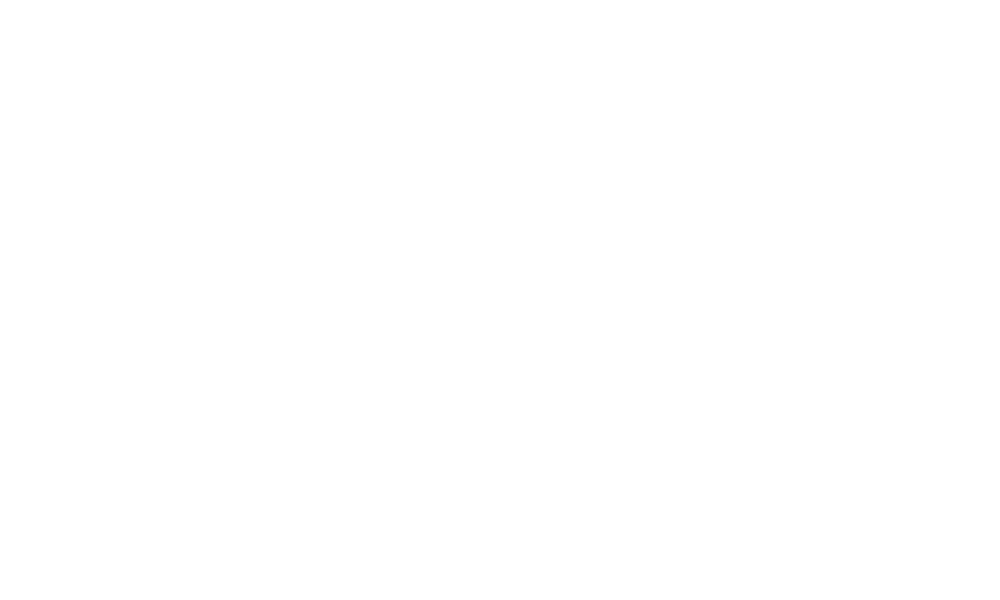

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [17]:
# Iterating my monte carlo simulation for different values of chemical potential mu
# Extreme case of for chemical potential is 1
# Manually choosing the values to see variations in crystal formation

T = np.arange(100,2001,500)

# Initialising my variables that I'm not varying so they stay constant

N = 15
mu = 1.6e-19
E_b = 1e-3
iters = 200000

# Iterating my function for different chemical potentials

i = 0
crystal = np.zeros((len(T),N,N))
T_fig = plt.figure(figsize=(10,6))
ax_T = []
roughness = np.zeros((len(T),2))

for i in range(len(T)):
    formation = square_grain_growth_mc_model(N,mu,E_b,T[i],iters)
    crystal[i] = formation
    s_bar = expected_height(crystal[i])
    growth_rate(s_bar,iters)
    roughness[i] = np.array([T[i],surface_roughness(crystal[i],s_bar)])
    
    # Now creating 3d plots for each of these crystal formations for different binding energies
    
    ax_T.append(T_fig.add_subplot(len(T) / 2,2,i+1,projection='3d'))
    ax_T[i].plot_surface(y2D,x2D,crystal[i],cmap='viridis')
    plt.subplots_adjust(wspace=0.4,hspace=0.4)

I've overcome this error by changing changing my original modelling function to take all the element values of P_p. However, I'm unsure why the program is reading P_p as an array in the first place, for different temperatures when I'm only calling a single temperature value into the function at a time.

## 12/03/2020
After receiving help, I realised that the error causing my temperature values to not be read correctly was naming the input of temperature in my function as Temp; however within my function itself I used T in my calculations involving temperature, resulting in my code using the arrays I had defined as T instead of the array elements I was slicing into my function inputs

## 15/03/2020
After iterating my function and simulating over a variety of temperatures ranging from 0 K to 1000 K I can see that the regions of significant and interesting growth rate exist between and 0 and 200 K, after this the roughness and growth rate plateau. To investigate growth rate and roughness further in these regions I will look at two extreme cases.

1. Where chemical potential dmu = 1; resulting in a P+ very close to 1

2. when binding energy Eb = 0 so P- will be very close to 0

In [3]:
# Creating plots of the growth rate and roughness throughout my number of iterations

N = 25
lattice = np.zeros((N,N))
mu = 4
E_b = 5
T = 293.15
iters = 200000

# Creating an array to hold my value of surface roughness, growth rate and the crystal itself for each iteration

rough = np.zeros(iters)
growth = np.zeros(iters)
crystal = np.zeros((iters,N,N))

iters_array = np.ones(iters)
for i in range(iters-1):
    iters_array[i+1] += np.sum(iters_array[:i])

for i in range(iters):
    crystal[i] = single_mc_growth(lattice,mu,E_b,T)
    s_bar = expected_height(crystal[i])
    growth[i] = growth_rate(s_bar,i)
    rough[i] = surface_roughness(crystal[i],s_bar)
    lattice = crystal[i]

# Plotting growth rate and roughness against my number of iterations

fig = plt.figure(figsize=(10,3))
rough_iters = fig.add_subplot(121)
rough_iters.plot(iters_array[:50],rough[:50])
rough_iters.set_xlabel('Time seconds')
rough_iters.set_ylabel('Roughness')
rough_iters.set_title('Time Evolution of Roughness')
growth_iters = fig.add_subplot(122)
growth_iters.plot(iters_array[:100],growth[:100])
growth_iters.set_xlabel('Time seconds')
growth_iters.set_ylabel('Growth Rate')
growth_iters.set_title('Time Evolution of Growth Rate')
plt.subplots_adjust(wspace=0.4,hspace=0.4)

NameError: name 'single_mc_growth' is not defined

In the above cell, I have changed my Monte Carlo function to simulate for a single time step, allowing me to create plots of roughness and growth behaviour over time.

In [1]:
N = 25
lattice = np.ones((N,N))
T = np.arange(500,20000,4000)
mu = 0
E_b = 5 * T
iters = 200000

# Array for time on the x-axis

iters_array = np.ones(iters)
for i in range(iters):
    iters_array[i] = i

# Investigating the growth of the lattice in its equilibrium state for different temperatures

# Creating an array to store my roughness and growth for each temperature

rough = np.zeros((len(T),iters))
growth = np.zeros((len(T),iters))
s_bar = np.zeros((len(T),iters))
#crystal = np.zeros((len(T),iters,N,N))

for i in range(len(T)):
    for j in range(iters):
        crystal = single_mc_growth(lattice,mu,E_b[i],T[i])
        s_bar[i,j] = expected_height(crystal)
        growth[i,j] = np.sum(s_bar[i,:j]) / j
        rough[i,j] = surface_roughness(crystal,s_bar[i,j])
        lattice = crystal

# Plotting my equilibrium plots for each temperature on the same graph

fig = plt.figure(figsize=(10,3))
roughness = fig.add_subplot(121)
growth_rate = fig.add_subplot(122)
for i in range(len(rough)):
    rough_label = '{}K'.format(T[i])
    roughness.plot(iters_array,rough[i],label=rough_label)
    growth_rate_label = '{}K'.format(T[i])
    growth_rate.plot(iters_array,growth[i],label=growth_rate_label)
roughness.set_title('Time evolution of Roughness')
roughness.set_xlabel('Time')
roughness.set_ylabel('Roughness')
roughness.legend(loc='best')
growth_rate.set_title('Time evolution of Growth Rate')
growth_rate.set_xlabel('Time')
growth_rate.set_ylabel('Growth Rate')
growth_rate.legend(loc='best')
plt.subplots_adjust(wspace=0.4,hspace=0.4)

NameError: name 'np' is not defined

The above piece of code is implementing my edited function and creating plots of the crystal growth in its equilibrium state when $\Delta \mu$ = 0, for a variety of temperatures. Here I am looking for a critical temperature where we begin to see significant roughening transition.
Some interesting behaviour that I'm observing for the equilibrium state of the crystal is that the roughness stays constant for certain periods of time then makes a step into a greater roughness (usually a more negative roughness implying the crystal surface is composed of more valleys than peaks). This behaviour resembles a step function.